# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install matplotlib
! pip install pandas
! pip install requests
! pip install scipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
cities_data = []
units = "imperial"

# Build Cities List
for x in range(len(cities)):
    query_url = f"{url}appid={weather_api_key}&units={units}"
    weather_response = requests.get(f'{query_url}&q={cities[x]}').json()
    
    try:
        city_lat = weather_response['coord']['lat']
        city_lon = weather_response['coord']['lon']
        city_humidity = weather_response['main']['humidity']
        city_temp = weather_response['main']['temp']
        city_country = weather_response['sys']['country']
        city_name = weather_response['name']
        city_windiness = weather_response['wind']['speed']
        city_clouds = weather_response['clouds']['all']

        cities_data.append({'City Name' : city_name,
                            'Country Code' : city_country,
                            'Latitude': city_lat, 
                            'Longitude': city_lon,
                            'Temperature' : city_temp, 
                            'Humidity' : city_humidity,
                            'Wind Speed' : city_windiness,
                            'Cloudiness' : city_clouds
                           })
        
        print(f"Processing record {x + 1} of {len(cities)} | {cities[x]}")
        
    except KeyError:
        print(f"Processing record {x +1} of {len(cities)} | City not Found! {cities[x]}")
  
    

Processing record 1 of 638 | butaritari
Processing record 2 of 638 | kapaa
Processing record 3 of 638 | klaksvik
Processing record 4 of 638 | castro
Processing record 5 of 638 | turukhansk
Processing record 6 of 638 | zhigansk
Processing record 7 of 638 | half moon bay
Processing record 8 of 638 | vestmannaeyjar
Processing record 9 of 638 | lagoa
Processing record 10 of 638 | hobart
Processing record 11 of 638 | chuy
Processing record 12 of 638 | ushuaia
Processing record 13 of 638 | nikolskoye
Processing record 14 of 638 | carnarvon
Processing record 15 of 638 | City not Found! illoqqortoormiut
Processing record 16 of 638 | City not Found! barentsburg
Processing record 17 of 638 | xining
Processing record 18 of 638 | zemio
Processing record 19 of 638 | rikitea
Processing record 20 of 638 | luderitz
Processing record 21 of 638 | tura
Processing record 22 of 638 | mataura
Processing record 23 of 638 | victoria
Processing record 24 of 638 | ballina
Processing record 25 of 638 | krutikha


Processing record 198 of 638 | morehead
Processing record 199 of 638 | wad rawah
Processing record 200 of 638 | agua prieta
Processing record 201 of 638 | zelenogorskiy
Processing record 202 of 638 | ust-maya
Processing record 203 of 638 | ko samui
Processing record 204 of 638 | rio grande
Processing record 205 of 638 | norman wells
Processing record 206 of 638 | hami
Processing record 207 of 638 | port macquarie
Processing record 208 of 638 | matamoros
Processing record 209 of 638 | pyapon
Processing record 210 of 638 | coos bay
Processing record 211 of 638 | ahipara
Processing record 212 of 638 | matagami
Processing record 213 of 638 | berdigestyakh
Processing record 214 of 638 | porterville
Processing record 215 of 638 | City not Found! grand river south east
Processing record 216 of 638 | saldanha
Processing record 217 of 638 | kutum
Processing record 218 of 638 | hasaki
Processing record 219 of 638 | ingham
Processing record 220 of 638 | faya
Processing record 221 of 638 | przheva

Processing record 396 of 638 | bunia
Processing record 397 of 638 | anito
Processing record 398 of 638 | manzhouli
Processing record 399 of 638 | torbay
Processing record 400 of 638 | chernyshevskiy
Processing record 401 of 638 | goundi
Processing record 402 of 638 | qui nhon
Processing record 403 of 638 | el alto
Processing record 404 of 638 | rocha
Processing record 405 of 638 | dunedin
Processing record 406 of 638 | olinda
Processing record 407 of 638 | puerto maldonado
Processing record 408 of 638 | mokolo
Processing record 409 of 638 | City not Found! banmo
Processing record 410 of 638 | City not Found! bolungarvik
Processing record 411 of 638 | nuuk
Processing record 412 of 638 | angoche
Processing record 413 of 638 | kormilovka
Processing record 414 of 638 | arlit
Processing record 415 of 638 | rio gallegos
Processing record 416 of 638 | singapore
Processing record 417 of 638 | cap malheureux
Processing record 418 of 638 | verkhnyaya inta
Processing record 419 of 638 | faqirwali

Processing record 595 of 638 | yar-sale
Processing record 596 of 638 | kalat
Processing record 597 of 638 | bud
Processing record 598 of 638 | chone
Processing record 599 of 638 | okhotsk
Processing record 600 of 638 | saint-francois
Processing record 601 of 638 | cap-chat
Processing record 602 of 638 | comodoro rivadavia
Processing record 603 of 638 | safita
Processing record 604 of 638 | maputo
Processing record 605 of 638 | briancon
Processing record 606 of 638 | City not Found! sao miguel do oeste
Processing record 607 of 638 | iskateley
Processing record 608 of 638 | madison
Processing record 609 of 638 | seoul
Processing record 610 of 638 | lujan
Processing record 611 of 638 | orlik
Processing record 612 of 638 | ulyanovka
Processing record 613 of 638 | ust-nera
Processing record 614 of 638 | City not Found! tapaua
Processing record 615 of 638 | penzance
Processing record 616 of 638 | boddam
Processing record 617 of 638 | berberati
Processing record 618 of 638 | pirajui
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(cities_data)
weather_df

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Butaritari,KI,3.0707,172.7902,79.48,82,9.64,60
1,Kapaa,US,22.0752,-159.3190,67.08,88,23.02,90
2,Klaksvík,FO,62.2266,-6.5890,42.80,100,24.16,90
3,Castro,BR,-24.7911,-50.0119,75.88,65,5.26,0
4,Turukhansk,RU,65.8167,87.9833,-14.76,89,9.57,100
...,...,...,...,...,...,...,...,...
579,Saint-Paul,RE,-21.0096,55.2707,73.06,83,5.75,75
580,Tiarei,PF,-17.5333,-149.3333,80.31,74,8.05,40
581,Presidencia Roque Sáenz Peña,AR,-26.7852,-60.4388,93.99,30,3.00,0
582,Pallasovka,RU,50.0500,46.8833,18.61,96,8.88,46


In [6]:
# output data to csv
weather_df.to_csv("../Output_Data/CityWeatherData.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Butaritari,KI,3.0707,172.7902,79.48,82,9.64,60
1,Kapaa,US,22.0752,-159.3190,67.08,88,23.02,90
2,Klaksvík,FO,62.2266,-6.5890,42.80,100,24.16,90
3,Castro,BR,-24.7911,-50.0119,75.88,65,5.26,0
4,Turukhansk,RU,65.8167,87.9833,-14.76,89,9.57,100


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_df.loc[weather_df['Humidity'] > 100]
humidity_df

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
northern_hemisphere = weather_df.loc[weather_df['Latitude'] >= 0]
northern_hemisphere
southern_hemisphere = weather_df.loc[weather_df['Latitude'] <= 0]
southern_hemisphere.head()

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
3,Castro,BR,-24.7911,-50.0119,75.88,65,5.26,0
9,Hobart,AU,-42.8794,147.3294,51.10,62,8.05,40
10,Chui,UY,-33.6971,-53.4616,74.89,62,9.17,69
11,Ushuaia,AR,-54.8000,-68.3000,62.60,48,10.36,75
13,Carnarvon,AU,-24.8667,113.6333,77.00,88,12.66,40


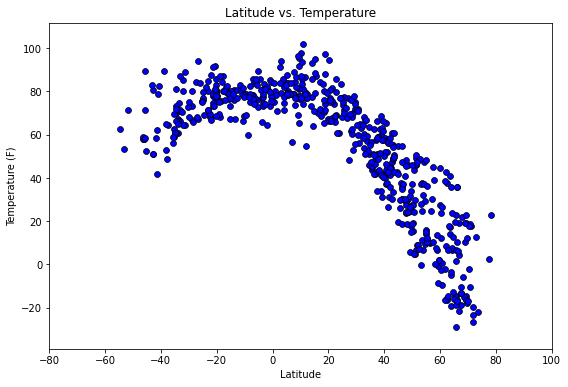

In [11]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs temperature
plt.scatter(x = weather_df['Latitude'], y = weather_df['Temperature'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
plt.title(f"Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Temperature']) - 10, max(weather_df['Temperature']) + 10)

plt.savefig('../Output_Data/Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

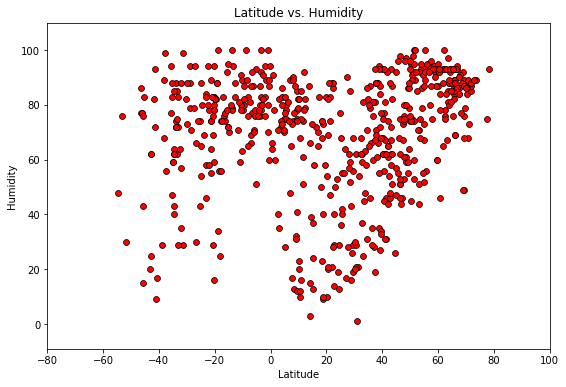

In [12]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs temperature
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'red', s=35)

# Add labeling
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Humidity']) - 10, max(weather_df['Humidity']) + 10)

plt.savefig('../Output_Data/Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

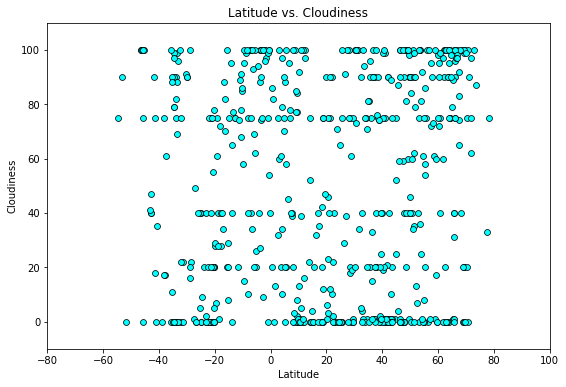

In [13]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs temperature
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'cyan', s=35)

# Add labeling
plt.title(f"Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Cloudiness']) - 10, max(weather_df['Cloudiness']) + 10)

plt.savefig('../Output_Data/Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

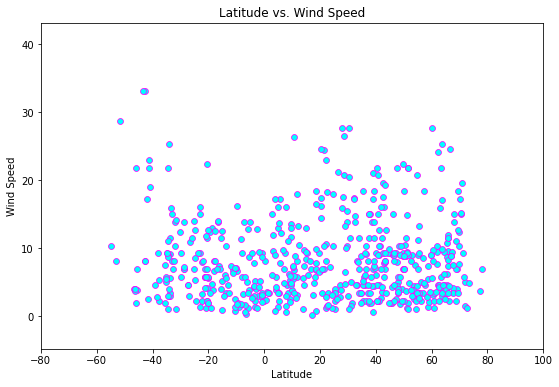

In [14]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs temperature
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'magenta', color = 'cyan', s=35)

# Add labeling
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Wind Speed']) - 5, max(weather_df['Wind Speed']) + 10)

plt.savefig('../Output_Data/Wind_Speed.png')
plt.show()

## Linear Regression

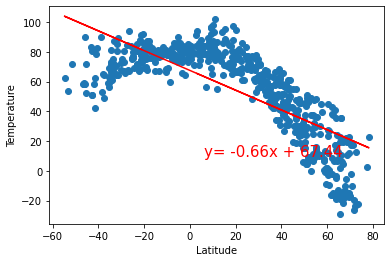

In [15]:
# Add the linear regression equation and line to plot
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../Output_Data/Linear_Regression.png')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

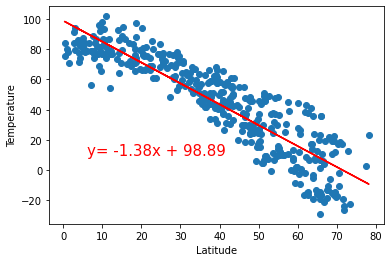

In [16]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../Output_Data/Northern_Temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

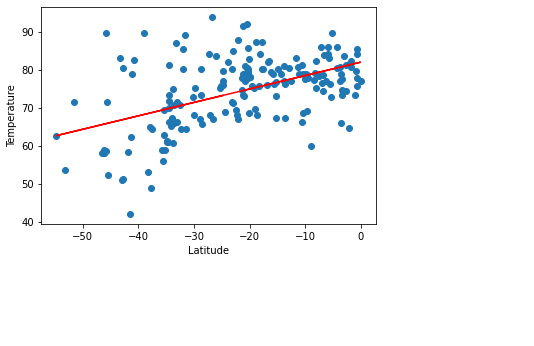

In [17]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../Output_Data/Southern_Temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

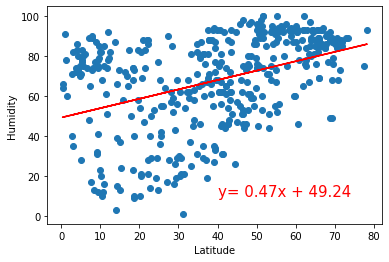

In [18]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../Output_Data/Northern_Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

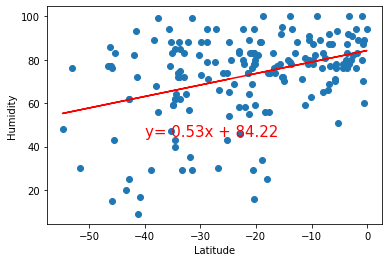

In [19]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../Output_Data/Southern_Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

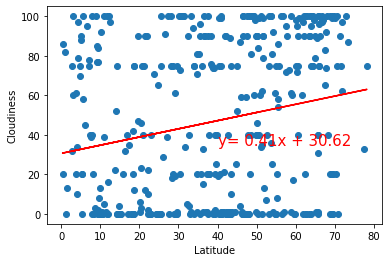

In [20]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('../Output_Data/Northern_Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

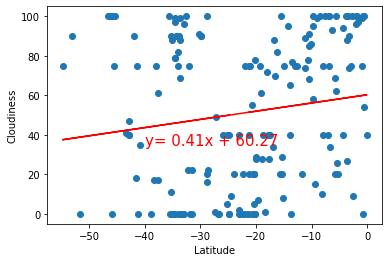

In [21]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('../Output_Data/Northern_Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

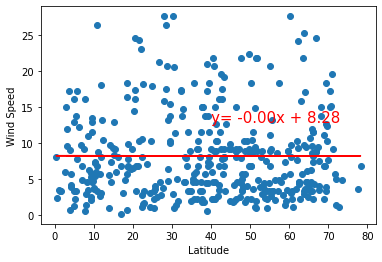

In [22]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('../Output_Data/Northern_Wind_Speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

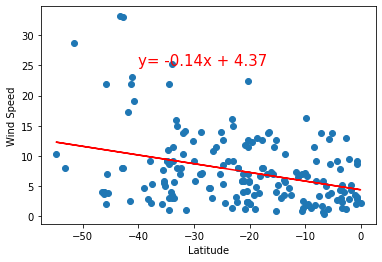

In [23]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('../Output_Data/Southern_Wind_Speed.png')
plt.show()